# Project 1

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv) is adapted from the World Health Organization on Strokes (it's based on real data but is NOT REAL). Use this dataset to answer the following questions and perform the following tasks. Feel free to add extra cells as needed, but follow the structure listed here and clearly identify where each question is answered. Please remove any superflous code.

## Data Information

- `reg_to_vote`: 0 if no, 1 if yes.
- `age`: age of the patient in years.
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- `ever_married`: 0 if no, 1 if yes.
- `Residence_type`: 0 for Rural, 1 for Urban.
- `avg_glucose_level`: average glucose level in blood.
- `bmi`: body mass index.
- `smoking_status_smokes`, `smoking_status_formerly`: Whether or not the person smokes, or formerly smoked. If a person has 0's for both these columns, they never smoked.
- `stroke`: 1 if the patient had a stroke or 0 if not.
- `dog_owner`: 0 if no, 1 if yes.
- `er_visits`: number of recorded Emergency Room visits in lifetime.
- `racoons_to_fight`: number of racoons the patient belives they could fight off at once.
- `fast_food_budget_month`: amount (in US dollars) spent on fast food per month.


## Part I: Logistic Regression
Build a logistic regression model to predict whether or not someone had a stroke based on **all** the other variables in the dataset.

1. Count the missing data per column, and remove rows with missing data (if any).
2. Use 10 fold cross validation for your model validation. Store both the train and test accuracies to check for overfitting. **Is the model overfit? How can you tell?**
3. Z-score your continuous variables only.
4. After completing steps 1-3, fit another logistic regression model on ALL of the data (no model validation) using the same predictors as before, and put the coefficients into a dataframe called `coef`.
5. print out a confusion matrix for the model you made in part 4. **What does this confusion matrix tell you about your model? How can you tell?**


In [465]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv


%matplotlib inline

In [466]:
# data
strokesDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")
strokesDF.head()


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


In [467]:
# PART I
# 1.
# Count the missing data per column
strokesDF.isnull().sum(axis = 0)


age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64

In [468]:
# remove rows with missing data (if any)
strokesDF.dropna(how='any', inplace=True)

In [469]:
# 2.Use 10 fold cross validation for your model validation. 
kf = KFold(n_splits = 10, shuffle = True)

strokePredictors = ["age", "hypertension", "heart_disease", "ever_married", "Residence_type", "avg_glucose_level", "bmi", "smoking_status_smokes", "smoking_status_formerly", "reg_to_vote", "dog_owner", "raccoons_to_fight", "fast_food_budget_month", "income_in_k"]

X = strokesDF[strokePredictors]
y = strokesDF["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create logistic regression
strokesModel = LogisticRegression() 

#create empty lists to store accuracy for each fold
trainAcc = []
testAcc = []


In [470]:
for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]
    
    # 3.
    zscore = StandardScaler()
    zscore.fit(X_train)
    
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    
    # model
    model = strokesModel.fit(Xz_train, y_train)
    
    # Store both the train and test accuracies to check for overfitting.
    trainAcc.append(accuracy_score(y_train, model.predict(Xz_train)))
    testAcc.append(accuracy_score(y_test, model.predict(Xz_test)))


In [471]:
# mean of the train data accuracies
np.mean(trainAcc)

0.9604915801527465

In [472]:
# mean of the test data accuracies
np.mean(testAcc)

0.9603440266547271

2. **Is the model overfit? How can you tell?** 

The model is not overfit, as the train and test error are almost identical. This means that there is a really good balance between the bias and variance of the model, and it does a great job of predicting output even with unseen data. If the test error was much higher than the train error, it would be a sign that the model was overfit, because it would mean that the model worked really well for data it was given, but did worse on unseen data, which would not be very useful for predicting future values. Since the errors in this model were so close, it's a good sign that the model is nearly perfectly fit. 


In [473]:
# 4.

X_full = strokesDF[strokePredictors]
y_full = strokesDF[["stroke"]] 

# create + fit logistic regression with all the data

zscore = StandardScaler()
X_full = zscore.fit_transform(X_full)

fullStrokesModel = LogisticRegression() 
fullStrokesModel.fit(X_full,y_full) 


LogisticRegression()

In [474]:
coef = pd.DataFrame({"PredictorName": strokePredictors, "CoefficientValue":fullStrokesModel.coef_[0]})
coef = coef.append({"CoefficientValue": fullStrokesModel.intercept_[0], 
               "PredictorName": "intercept"}, ignore_index = True)

In [475]:
coef

,PredictorName,CoefficientValue
0,age,1.610697
1,hypertension,0.073915
2,heart_disease,0.095324
3,ever_married,-0.090008
4,Residence_type,-0.010525
5,avg_glucose_level,0.242977
6,bmi,0.109345
7,smoking_status_smokes,0.108225
8,smoking_status_formerly,0.058284
9,reg_to_vote,-0.030363


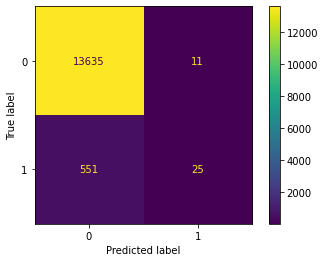

In [476]:
# 5. print out a confusion matrix for the model you made in part 4.
plot_confusion_matrix(fullStrokesModel, X_full, y_full)

5. **What does this confusion matrix tell you about your model? How can you tell?**

This confusion matrix tells us that the model predicted the correct value 13,660 times and the incorrect outcome 562 times. However, it mostly got the outcome correct when the outcome was no stroke versus having a stroke. When the true outcome was 1 (Had stroke), the model predicted that they did not have a stroke 551 times, and they predicted it correctly only 25 times. This means that the model is more likely to predict not having a stroke, which could be dangerous if used to predict future outcomes, as we couldn't warn people at risk of having one as well since the model did not predict this outcome correctly. These predictors may not be the best indicators for whether a stroke occurred or not.

## Part II: Data Exploration

The WHO has asked the following five questions, create **at least 1 ggplot graph** (using the above data + model when needed) to help answer each question, and **explicitly answer the question in a Markdown cell** below your graph. You may use other calculations to help support your answer but MUST pair it with a graph. Write your answer as if you were explaining it to a non-data scientist. You will be graded on the effectiveness and clarity of your graph, as well as the completeness, clarity, and correctness of your responses and justifications.

1. Do dog-owners over 50 have a higher probability of stroke than non-dog owners who currently smoke? How can you tell?
2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?
3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 100k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part I-4 to check accuracy).
4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?
5. Create a variable `er_visits_per_year` that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

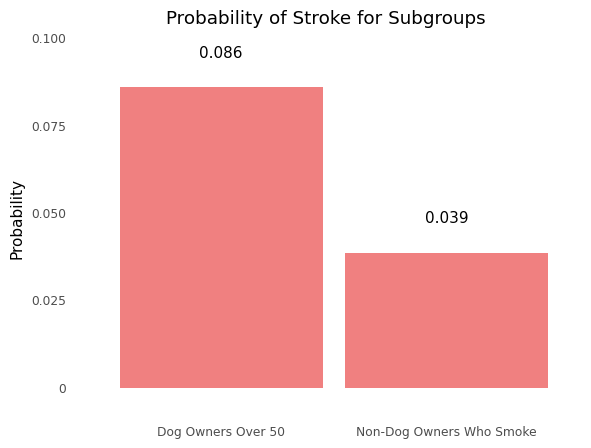

<ggplot: (8787908543034)>

In [477]:
# PART II, 1. 
# Do dog-owners over 50 have a higher probability of stroke than non-dog owners 
# who currently smoke? How can you tell?

# subsetting stroke dataframe to get only relevant variables
smallDF = strokesDF[["dog_owner", "age", "stroke", "smoking_status_smokes"]]

dog50 = (smallDF['age'] > 50) & (smallDF['dog_owner'] == 1.0)
noDogSmoker = (smallDF['smoking_status_smokes'] == 1.0) & (smallDF['dog_owner'] == 0.0)

# getting the mean (probability) of each group
dog50Mean = smallDF[dog50]['stroke'].mean()
noDogSmokerMean = smallDF[noDogSmoker]['stroke'].mean()

graphDF = pd.DataFrame({"Type": ["Dog Owners Over 50", "Non-Dog Owners Who Smoke"], "Probability":[dog50Mean, noDogSmokerMean]})

(ggplot(graphDF, aes(x= "Type", y = "Probability"))+ 
 geom_bar(position="dodge",stat="identity") +
 stat_summary(fun_data = "mean_sdl",geom = "bar", fill = "lightcoral") + 
 geom_text(aes(label=[0.086, 0.039]), nudge_y = 0.01) +
 theme_minimal() +
 theme(panel_grid_major_x = element_blank(),
      panel_grid_major_y = element_blank(),
      panel_grid_minor_y = element_blank()) +
 labs(x = "", title = "Probability of Stroke for Subgroups")
)

1. DISCUSSION:

Dog owners over 50 have a higher probability of stroke than non-dog owners who currently smoke. The probability of having a stroke for dog owners over 50 is 8.6%, while the probability for non-dog owners who currently smoke is 3.9%. I found these probabilities by taking the mean of the data for the stroke column for each group, because the mean aggregates all the people who had a stroke ("1" in the dataframe), and divides it by the total number of people in that group, giving the probability that they had a stroke. 

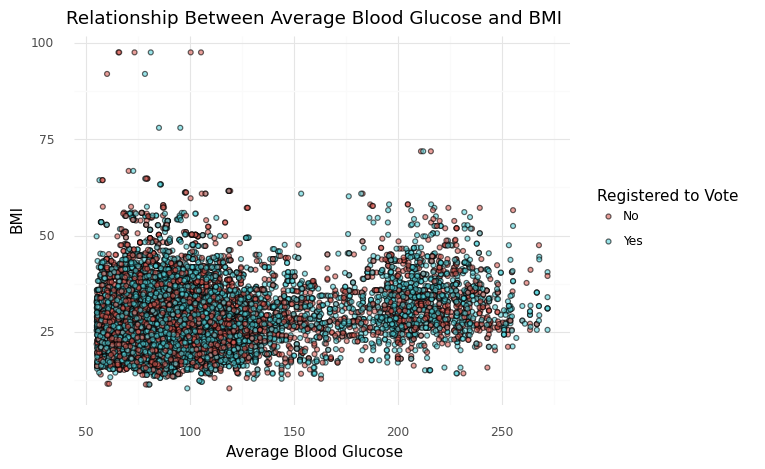

<ggplot: (8787909030274)>

In [478]:
# PART II, 2.  
# What is the relationship between average blood glucose and BMI? 
# Is the relationship between those two variables different for people 
# who are and are not registered to vote? 
# How can you tell?

((ggplot(strokesDF, aes (x = "avg_glucose_level", y = "bmi", fill = "factor(reg_to_vote)")) + 
  geom_point(alpha = .6)) + theme_minimal() + 
  labs(x = "Average Blood Glucose", 
       y = "BMI", 
       fill = "Registered to Vote",
       title = "Relationship Between Average Blood Glucose and BMI",
       subtitle = "Factored by Voting Status") +
  scale_fill_discrete(
    labels = ["No", "Yes"]
  )
)


2. DISCUSSION:

There is no strong relationship between average blood glucose and BMI. As the values of blood glucose get higher, the BMI of the different data points do not greatly differ/ get higher or lower that at any other point. Although there are two clusters around the lower and higher ends of avg blood glucose, this doesn't say much about the relationship between those and BMI, but moreso that not many people in this data set had avg blood glucose levels in between the 150-200 range compared to less than or greater than that range. 

When I took into account the variable register to vote, it did not show any real difference between the two. The red and blue values are pretty homogenous within the data with no stark pattern of just red or just blue anywhere, so I don't believe the relationship between avg blood glucose and BMI are different based on registration status.

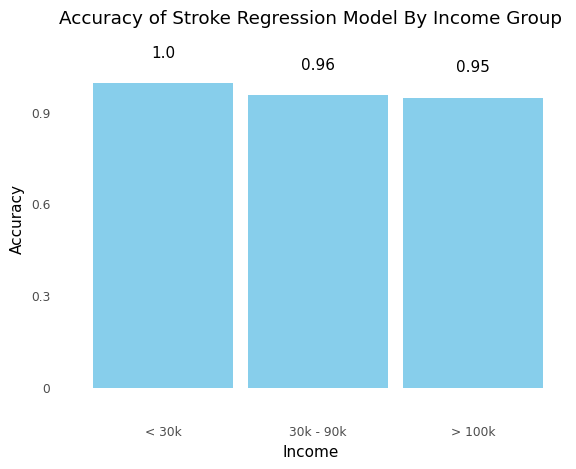

<ggplot: (8787908341432)>

In [479]:
# PART II, 3.
# Is your logistic regression model most accurate for people 
# who make less than 30k, between 30-90k, or over 100k? 
# Discuss the potential accuracy *and* ethical implications if 
# your model *were* more accurate for different groups 
# (you can use the full model from part I-4 to check accuracy).

#subsetting strokes df to get relevant variables
incomeDF = strokesDF[["income_in_k", "stroke"]]
incomeDF.head()
preds = fullStrokesModel.predict(X_full) 
incomeDF["Predicted Values"] = preds
incomeDF.head()

# Dataframe and accuracy for less than 30k income
DF1 = incomeDF.loc[incomeDF["income_in_k"] < 30]
DF1Acc = accuracy_score(DF1["stroke"], DF1["Predicted Values"])

# Dataframe and accuracy for income between 30k and 90k
DF2 = incomeDF.loc[(incomeDF["income_in_k"] >= 30) & \
                   (incomeDF["income_in_k"] <= 90)]
DF2Acc = accuracy_score(DF2["stroke"], DF2["Predicted Values"])

# Dataframe and accuracy for more than 100k income
DF3 = incomeDF.loc[incomeDF["income_in_k"] > 100]
DF3Acc = accuracy_score(DF3["stroke"], DF3["Predicted Values"])


# creating DF with necessary info and plotting
graphDF = pd.DataFrame({"Income": ["< 30k", "30k - 90k", "> 100k"], \
                        "Accuracy": [DF1Acc, DF2Acc, DF3Acc]})

(ggplot(graphDF, aes(x= "Income", y = "Accuracy"))+ 
 geom_bar(position="dodge",stat="identity") +
 stat_summary(fun_data = "mean_sdl",
              geom = "bar", fill = "skyBlue") + 
 theme_minimal() + 
 geom_text(aes(label=[1.0, 0.96, 0.95]), nudge_y = 0.1) +
 theme(panel_grid_major_x = element_blank(),
       panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_minor_x = element_blank())+
 scale_x_discrete(limits=["< 30k", "30k - 90k", "> 100k"]) +
 ggtitle("Accuracy of Stroke Regression Model By Income Group")
)



3. DISCUSSION: 

My logistic regression is most accurate for people who make less than 30k, as the accuracy of the model for those people was 100%, compared to 96% for 30k-90k and 95% for greater than 100k. This isn't a huge difference in accuracy, but I do want to look more into how there is a 100% accuracy for people who make less than 30k. When we look at the sample size in each category, we see that <30k has 237 values, 30-90k has 11,091 values, and >100k has 1,732 values. Because there are only 237 data points for the lowest income category, it could make the accuracy higher than it may actually be, simply by chance. I would want to test this model on equally sized groups to check if the accuracies are actually as different as they appear. 

If the accuracies *were* vastly different for lower incomes and higher incomes, it could have many negative ethical implications. In general, higher income people in the US have better access to healthcare, so they would have a better chance of finding out potential health problems just by speaking to their doctos. Since this model is predicting the odds of having a stroke, having more accuracy for higher income people could mean that they could have access to more preventative healthcare for strokes, as more people in that group could be notified by their doctors that they are at a higher risk for stroke. If the accuracy was less for lower income, it could mean that less people in that group who are at higher risk for stroke would be able to access the preventative care they need, simply because the model was not accurate enough to include them as high risk. This could leave lower income people at higher risk of d

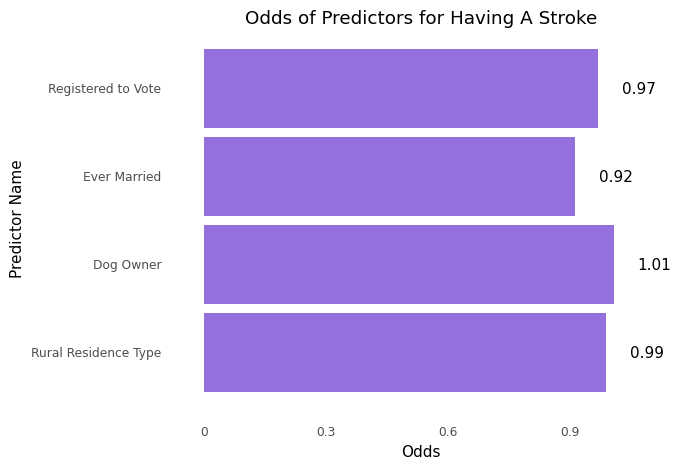

<ggplot: (8787937602329)>

In [480]:
# PART II, 4
# Which of the following variables is the strongest predictor of 
# having a stroke (owning a dog, residence type, marriage, 
# being registered to vote)? 
# How were you able to tell?

coef["Odds"] = np.exp(coef["CoefficientValue"])

# subsetting to get the 4 predictors
subsetDF = coef.loc[(coef["PredictorName"] == "dog_owner") | \
                    (coef["PredictorName"] == "Residence_type") | \
                    (coef["PredictorName"] == "reg_to_vote") | \
                    (coef["PredictorName"] == "ever_married")]
    

# plotting odds
(ggplot(subsetDF,aes(x = "PredictorName",y = "Odds")) + 
 geom_bar(position="dodge",stat="identity") +
 coord_flip() +
 stat_summary(fun_data = "mean_sdl",geom = "bar", fill = "mediumpurple") + 
 theme_minimal() + 
 geom_text(aes(label=[0.92, 0.99, 0.97, 1.01]), nudge_y = 0.1) + 
 labs(x = "Predictor Name", title = "Odds of Predictors for Having A Stroke") + 
 theme(panel_grid_major_x = element_blank(),
       panel_grid_major_y = element_blank(),
       panel_grid_minor_y = element_blank(),
       panel_grid_minor_x = element_blank()) +
 scale_x_discrete(labels = ["Rural Residence Type", "Dog Owner", \
                            "Ever Married", "Registered to Vote"])
)

4. DISCUSSION:

Out of the four predictors (owning a dog, residence type, marriage, and being registered to vote), the strongest one was owning a dog, with odds of 1.01. This means being a dog owner is associated with a 1.01 times increase in the odds having a stroke. Although this is still an extremely small odd, it is the highest of the the four predictors shown. The other three predictors are all associated with a less likely chance of having a stroke.

In [481]:
# PART II, 5
#Create a variable er_visits_per_year that calculates the # of 
# visits to the ER that a person has had per year of life. 
# Store this variable in your data frame (no need to include 
# this variable in the previous logistic regression model). 
# Is the # of ER visits per year different for stroke and non-stroke 
# patients? How can you tell?

# subsetting strokes df and calculating er visits per year
erVisitsDF = strokesDF[["er_visits", "age", "stroke"]]
erVisitsDF["er_visits_per_year"] = erVisitsDF["er_visits"] / \
            erVisitsDF["age"]

In [482]:
#calculating the upper and lower whiskers to find the outliers
Q1 = erVisitsDF["er_visits_per_year"].quantile(0.25)
Q3 = erVisitsDF["er_visits_per_year"].quantile(0.75)

IQR = Q3-Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

In [483]:
# removing the outliers from the dataframe
erVisitsDF = erVisitsDF[erVisitsDF["er_visits_per_year"] < Upper_Whisker]

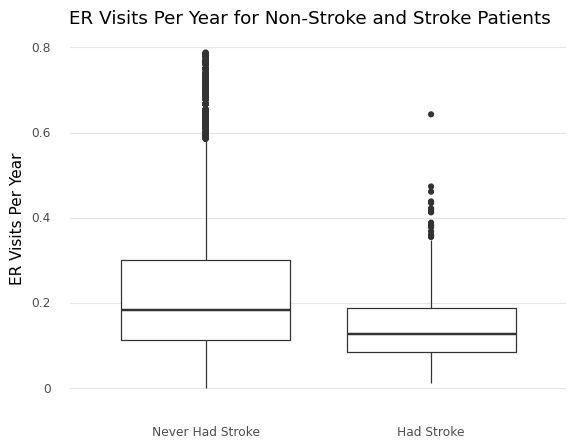

<ggplot: (8787910407476)>

In [484]:
# plotting graph
(ggplot(erVisitsDF, aes(x = "factor(stroke)",
                     y = "er_visits_per_year")) +
 geom_boxplot() + 
 theme_minimal() + 
 labs(x = "", y = "ER Visits Per Year", title = "ER Visits Per Year for Non-Stroke and Stroke Patients") +
 theme(panel_grid_major_x = element_blank(),
      panel_grid_minor_y = element_blank()) + 
 scale_x_discrete(labels = ["Never Had Stroke", "Had Stroke"])
)

5. DISCUSSION:

    The number of ER visits per year is different for stroke and non-stroke patients, as the median, upper quartile, and extreme values for the non-stroke patients are all higher than the patients with strokes. However, there were also significantly more patients who did not have a stroke (11,965) in this dataframe versus people who did have a stroke (575), so in the future, I would want to use a more equal number from each category so I could verify these results.
    
    In order to create a useful visualization, I used the Interquartile Range(IQR) Method to remove extreme outliers from the dataframe. I removed all data points that fell outside of 1.5 times the IQR above the 3rd quartile (Q3) and below the 1st quartile (Q1). The extreme outliers in this case were caused by many young infants being included in the data, all with ages less than 1 year. This meant that when I divided the number of ER visits by their age, the number was multiplied, causing numbers as high as 150. This is not a very useful number as a baby born with health problems could go to the ER a number of times, but that doesn't mean that they will be averaging near 150 trips every year in their lifetime. Since these values were so extreme, I believe it was best to focus on the values of older people in the dataframe, who would have a more meaningful average throughout their lifetimes.